<h1> Part 1 </h1>

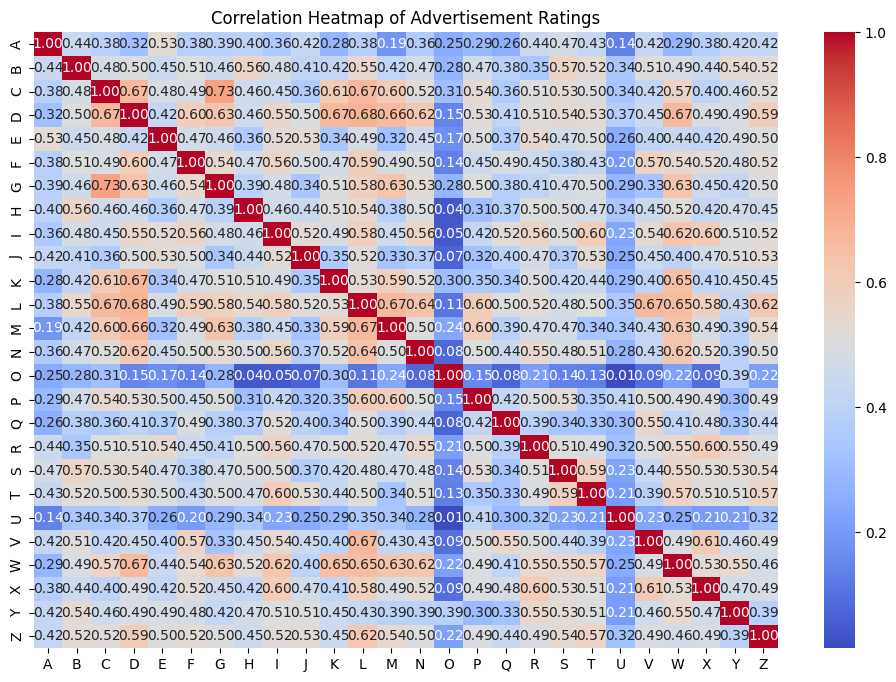

The participant with ID 'O' is the outlier with an average correlation of 0.20.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("BRSM_Assignment_2_datasets.xlsx", sheet_name="Advert Rating")

# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Advertisement Ratings')
plt.show()

# Find the participant with the lowest average correlation
average_corr = corr_matrix.mean()
outlier = average_corr.idxmin()
min_corr = average_corr.min()

print(f"The participant with ID '{outlier}' is the outlier with an average correlation of {min_corr:.2f}.")


In [6]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "BRSM_Assignment_2_datasets.xlsx"
sheet_name = "Reliable Job"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the columns corresponding to job satisfaction
job_satisfaction_data = df[['JS1', 'JS2', 'JS3', 'JS4']]

# Calculate Spearman correlations between JS items
correlation_matrix = job_satisfaction_data.corr(method='spearman')

# Extracting lower triangle of the correlation matrix (excluding diagonal)
lower_tri = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))

# Calculating mean correlation
mean_correlation = lower_tri.stack().mean()

# Number of JS items
num_items_JS = 4

# Calculating Cronbach's Alpha for Job Satisfaction
cronbach_alpha_JS = (num_items_JS*mean_correlation) / (1 + (num_items_JS-1)*mean_correlation)

# Printing Cronbach's Alpha for Job Satisfaction
print("Cronbach's Alpha for Job Satisfaction:", cronbach_alpha_JS)


Cronbach's Alpha for Job Satisfaction: 0.8584496719182925


In [7]:
import pandas as pd
import numpy as np

# Load the Excel file
file_path = "BRSM_Assignment_2_datasets.xlsx"
sheet_name = "Reliable Job"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the columns corresponding to job satisfaction
job_performance_data = df[['JP1', 'JP2', 'JP3', 'JP4']]

# Calculate Spearman correlations between JS items
correlation_matrix = job_performance_data.corr(method='spearman')

# Extracting lower triangle of the correlation matrix (excluding diagonal)
lower_tri = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))

# Calculating mean correlation
mean_correlation = lower_tri.stack().mean()

# Number of JS items
num_items_JP = 4

# Calculating Cronbach's Alpha for Job Satisfaction
cronbach_alpha_JP = (num_items_JP*mean_correlation) / (1 + (num_items_JP-1)*mean_correlation)

# Printing Cronbach's Alpha for Job Satisfaction
print("Cronbach's Alpha for Job Performance:", cronbach_alpha_JP)


Cronbach's Alpha for Job Performance: 0.524235103409064


In [8]:
import pandas as pd
import pingouin as pg

# Load the Excel file
file_path = "BRSM_Assignment_2_datasets.xlsx"
sheet_name = "Reliable Job"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Extract the columns corresponding to job satisfaction and job performance
job_satisfaction_data = df[['JS1', 'JS2', 'JS3', 'JS4']]
job_performance_data = df[['JP1', 'JP2', 'JP3', 'JP4']]

# Calculate Cronbach's alpha for job satisfaction
cronbach_alpha_JS = pg.cronbach_alpha(data=job_satisfaction_data)

# Calculate Cronbach's alpha for job performance
cronbach_alpha_JP = pg.cronbach_alpha(data=job_performance_data)

# Print the results
print("Cronbach's Alpha for Job Satisfaction:", cronbach_alpha_JS)
print("Cronbach's Alpha for Job Performance:", cronbach_alpha_JP)


Cronbach's Alpha for Job Satisfaction: (0.8626397330950806, array([0.76 , 0.928]))
Cronbach's Alpha for Job Performance: (0.5576079090938278, array([0.227, 0.769]))


: 

<h1> Q3 </h1>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy
df = pd.read_excel("BRSM_Assignment_2_datasets.xlsx", sheet_name="Yulu")
df.describe()

C:\Users\radha\AppData\Local\Temp\ipykernel_9084\1854305650.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


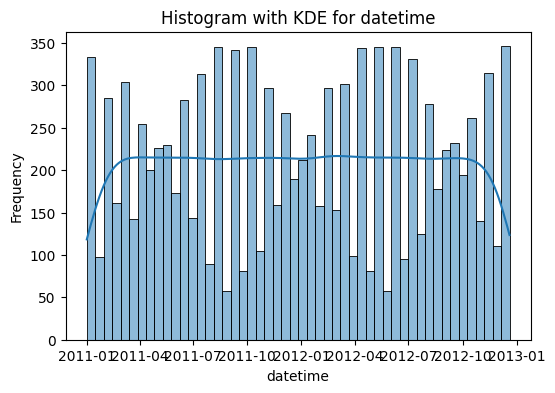

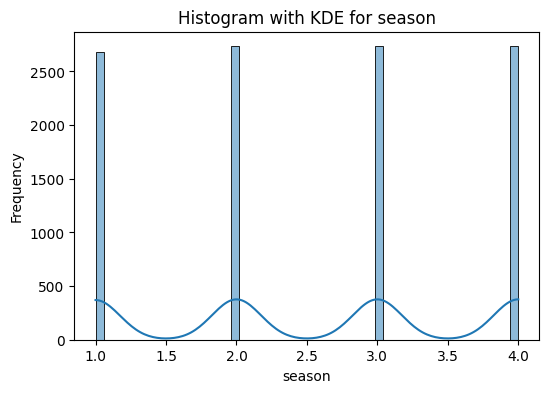

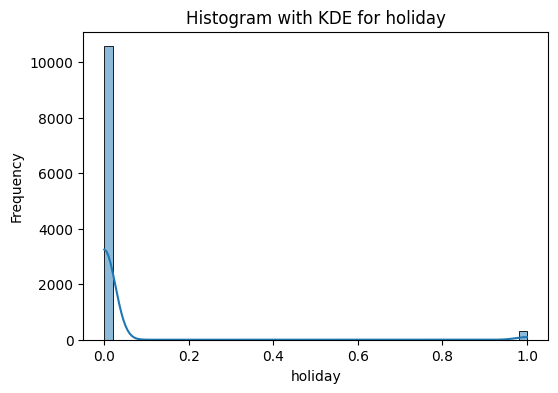

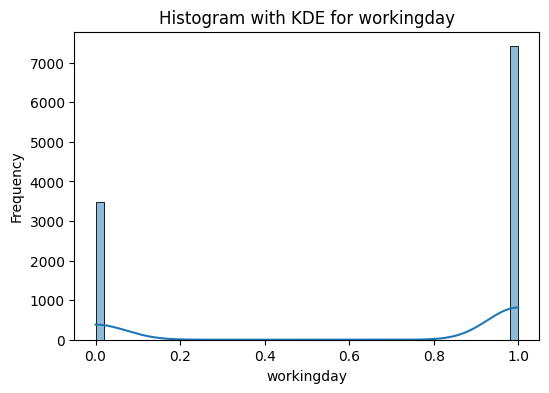

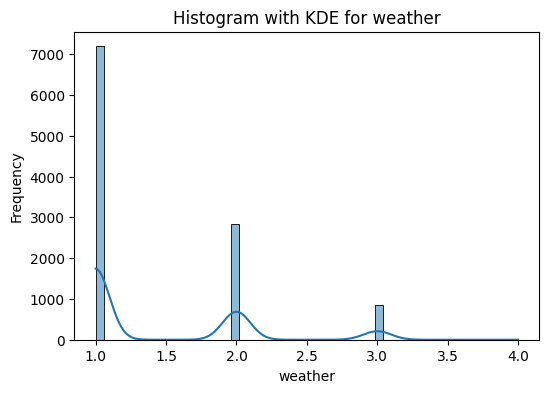

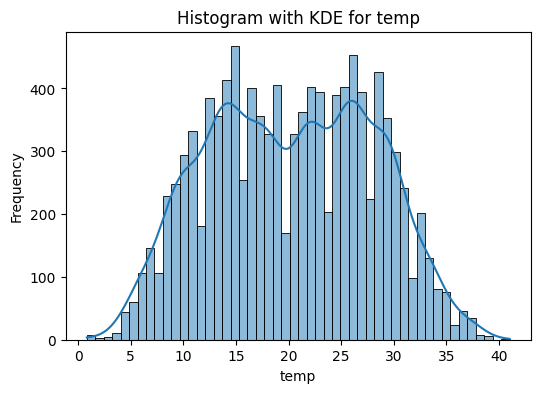

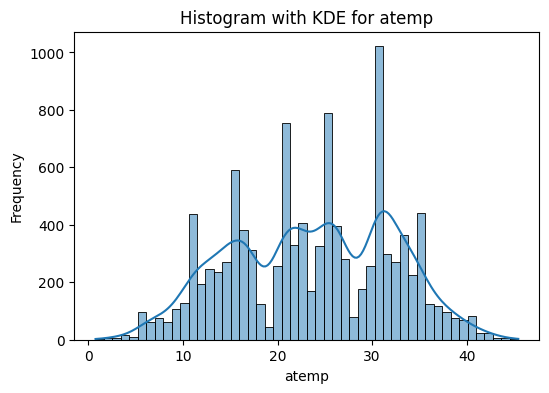

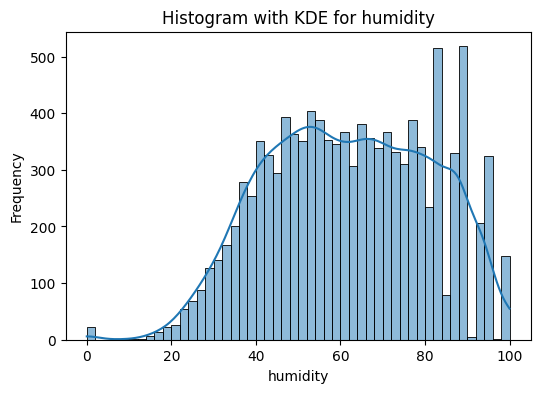

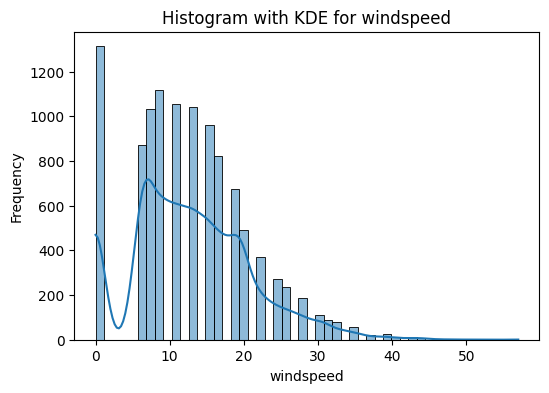

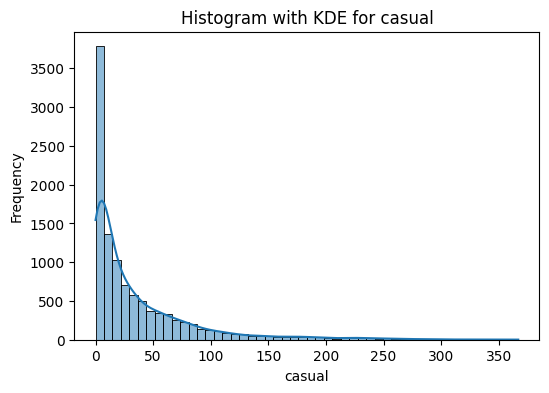

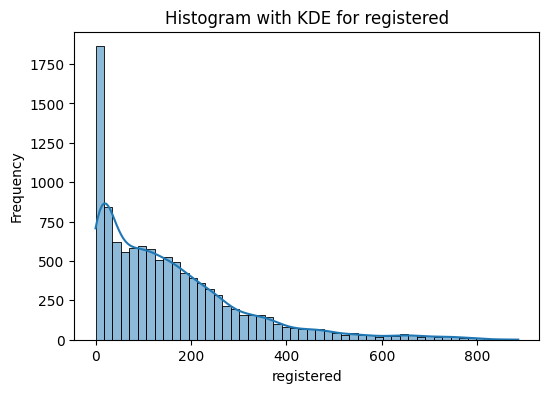

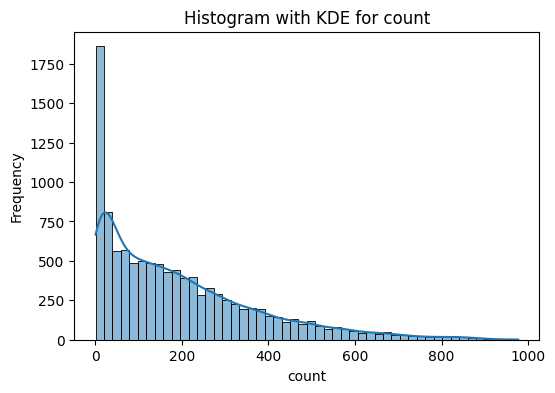

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Get the list of column names
columns = df.columns

# Plot histogram with KDE for each column in separate plots
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True, bins=50)
    plt.title(f'Histogram with KDE for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


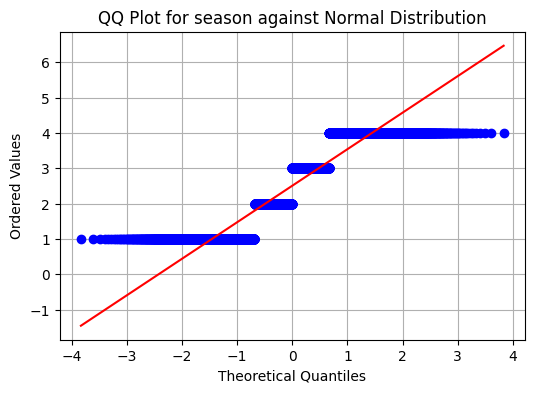

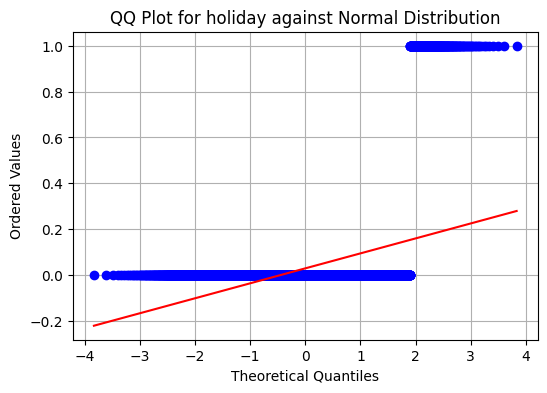

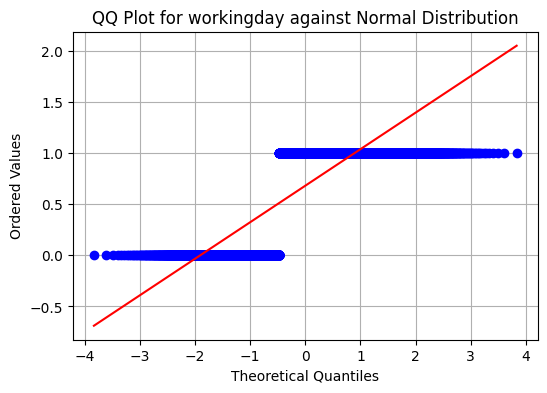

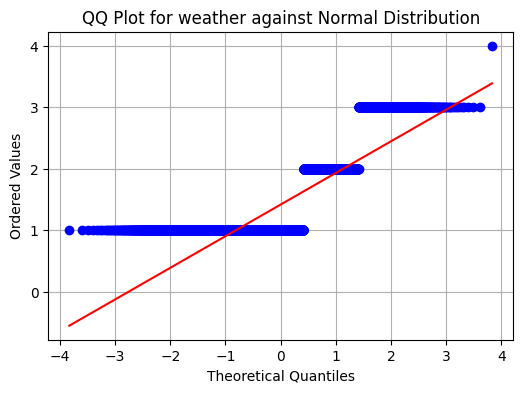

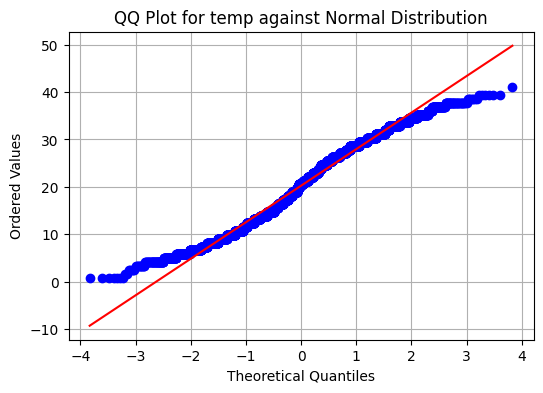

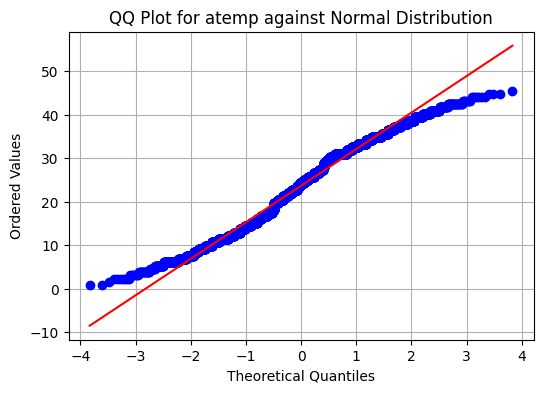

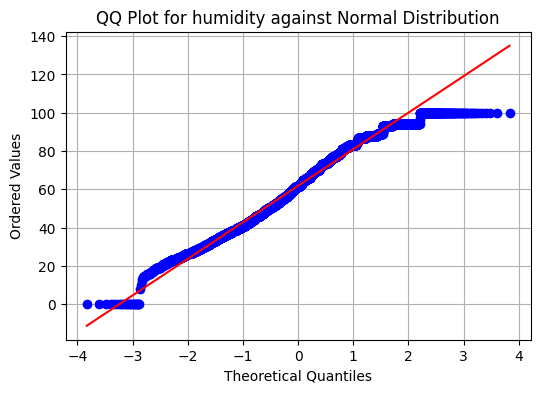

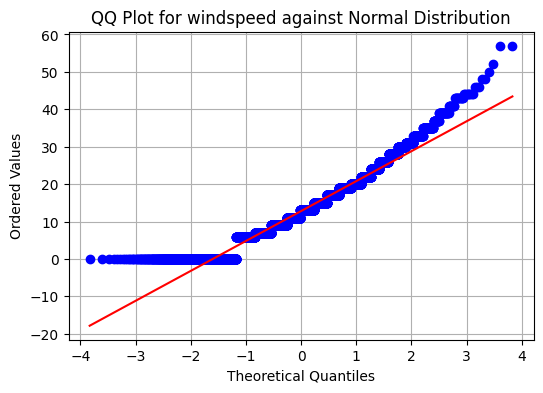

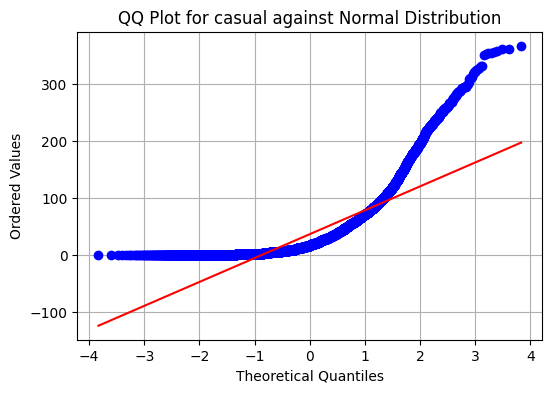

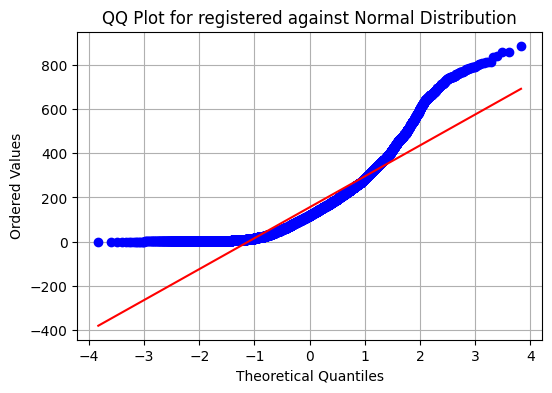

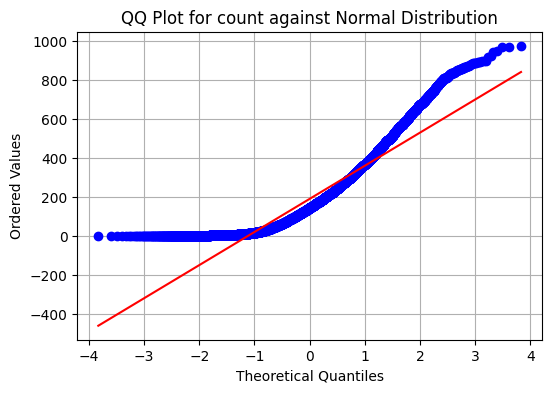

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Get the list of column names excluding the first column
columns = df.columns[1:]

# Plot QQ plot for each column against normal distribution
for col in columns:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ Plot for {col} against Normal Distribution')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.grid(True)
    plt.show()


<h2> Clearly none of them follow a normal distribution, as can be seen from the variance across the normal line </h2>

In [7]:
import scipy.stats as stats

# Assuming df is your DataFrame

# Get the list of column names excluding the first column
columns = df.columns[1:]

# Perform Shapiro-Wilk test for each column
for col in columns:
    # Sample the data for Shapiro-Wilk test (for performance)
    sample_data = df[col].sample(min(500, len(df[col])))
    
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(sample_data)
    
    # Define significance level
    alpha = 0.05
    
    # Determine if the column follows a normal distribution based on the p-value
    if p_value > alpha:
        print(f"{col}: Follows a normal distribution (p-value: {p_value})")
    else:
        print(f"{col}: Does not follow a normal distribution (p-value: {p_value})")


season: Does not follow a normal distribution (p-value: 4.514297803329801e-21)
holiday: Does not follow a normal distribution (p-value: 1.2569647224993609e-42)
workingday: Does not follow a normal distribution (p-value: 3.3383822096898063e-32)
weather: Does not follow a normal distribution (p-value: 8.237145196098984e-30)
temp: Does not follow a normal distribution (p-value: 2.3987803388081375e-07)
atemp: Does not follow a normal distribution (p-value: 5.425566200756293e-07)
humidity: Does not follow a normal distribution (p-value: 9.931865861290134e-06)
windspeed: Does not follow a normal distribution (p-value: 4.278614615382814e-11)
casual: Does not follow a normal distribution (p-value: 1.9356239972065123e-26)
registered: Does not follow a normal distribution (p-value: 2.54092241964788e-20)
count: Does not follow a normal distribution (p-value: 5.71438080642711e-19)


In [9]:
import scipy.stats as stats
from scipy.stats import boxcox
import numpy as np

# Assuming df is your DataFrame

# Get the list of column names excluding the first column
columns = df.columns[1:]

# Define a function to perform Box-Cox transformation and check normality
def check_normality_and_boxcox(data):
    # Sample the data for Box-Cox transformation and Shapiro-Wilk test (for performance)
    sample_data = data.sample(min(5000, len(data)))
    
    # Perform Box-Cox transformation
    transformed_data, lambda_value = boxcox(sample_data + 1)  # Adding 1 to handle non-positive values
    
    # Perform Shapiro-Wilk test on the transformed data
    stat, p_value = stats.shapiro(transformed_data)
    
    # Define significance level
    alpha = 0.05
    
    # Determine if the transformed data follows a normal distribution based on the p-value
    if p_value > alpha:
        print(f"Follows a normal distribution (p-value: {p_value})")
    else:
        print(f"Does not follow a normal distribution (p-value: {p_value})")
    
    return transformed_data, lambda_value

# Perform Box-Cox transfoarmation and check normality for each column
for col in columns:
    print(f"\nColumn: {col}")
    transformed_data, lambda_value = check_normality_and_boxcox(df[col])
    print(f"Lambda value for Box-Cox transformation: {lambda_value}\n")



Column: season
Does not follow a normal distribution (p-value: 0.0)
Lambda value for Box-Cox transformation: 0.7118453023582633


Column: holiday
Does not follow a normal distribution (p-value: 0.0)
Lambda value for Box-Cox transformation: -53.83190600952108


Column: workingday
Does not follow a normal distribution (p-value: 0.0)
Lambda value for Box-Cox transformation: 3.4511389734405626


Column: weather
Does not follow a normal distribution (p-value: 0.0)
Lambda value for Box-Cox transformation: -4.350604780900573


Column: temp
Does not follow a normal distribution (p-value: 7.066809752929669e-25)
Lambda value for Box-Cox transformation: 0.8351628384481716


Column: atemp
Does not follow a normal distribution (p-value: 1.0765157063029099e-25)
Lambda value for Box-Cox transformation: 1.0005141968386282


Column: humidity
Does not follow a normal distribution (p-value: 4.9510302751168416e-24)
Lambda value for Box-Cox transformation: 1.0493347175239276


Column: windspeed
Does not f

In [13]:
import pandas as pd
import pingouin as pg
import warnings

warnings.filterwarnings("ignore")

# Load the Excel file
file_path = "BRSM_Assignment_2_datasets.xlsx"
df = pd.read_excel(file_path, sheet_name="Yulu")

# Drop any duplicate column names (if any)
df = df.loc[:, ~df.columns.duplicated()]

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate partial correlations for all pairs of numeric variables
partial_correlations = {}
for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 != col2:
            partial_corr = pg.partial_corr(data=df, x=col1, y=col2)
            partial_correlations[(col1, col2)] = partial_corr['r'][0]

# Print the partial correlations
print("Partial Correlations:")
for pair, corr in partial_correlations.items():
    print(f"{pair}: {corr}")


Partial Correlations:
('season', 'holiday'): 0.0293676097149142
('season', 'workingday'): -0.00812605786621615
('season', 'weather'): 0.008878650849278316
('season', 'temp'): 0.2586885507660313
('season', 'atemp'): 0.2647443262548638
('season', 'humidity'): 0.1906100203714224
('season', 'windspeed'): -0.14712120942027967
('season', 'casual'): 0.09675806284610487
('season', 'registered'): 0.1640105339313825
('season', 'count'): 0.16343901657636156
('holiday', 'season'): 0.029367609714914197
('holiday', 'workingday'): -0.2504913911873006
('holiday', 'weather'): -0.0070739115058341745
('holiday', 'temp'): 0.00029460339338623423
('holiday', 'atemp'): -0.005214778224356032
('holiday', 'humidity'): 0.0019287112385997735
('holiday', 'windspeed'): 0.008408737782324288
('holiday', 'casual'): 0.043798928675346335
('holiday', 'registered'): -0.020955672935330905
('holiday', 'count'): -0.005392984477774388
('workingday', 'season'): -0.00812605786621615
('workingday', 'holiday'): -0.250491391187300

Temperature and Atemp: Both 'temp' and 'atemp' have strong positive partial correlations with each other (approximately 0.98). This suggests that after controlling for the influence of other variables, temperature and apparent temperature remain highly correlated, which is expected since apparent temperature is derived from temperature.

Casual and Registered: The partial correlation between 'casual' and 'registered' is very high (approximately 0.97), indicating a strong positive association between the number of casual and registered users, even after accounting for the influence of other variables. This implies that these two types of users contribute similarly to the overall bike rental count.

Temperature and Count: Both 'temp' and 'atemp' have relatively strong positive partial correlations with 'count' (approximately 0.39-0.40). This suggests that temperature, whether actual or apparent, has a positive influence on the overall bike rental count after controlling for other variables.

Humidity and Count: 'Humidity' has a negative partial correlation with 'count' (approximately -0.32), indicating that higher humidity is associated with lower bike rental counts after controlling for other factors. This suggests that humidity may have a negative impact on the demand for bike rentals.

Workingday and Casual/Registered: 'Workingday' has a notable negative partial correlation with 'casual' (-0.32) and a positive partial correlation with 'registered' (0.12). This implies that on working days, there tend to be fewer casual rentals but more registered rentals compared to non-working days.

In [12]:
# Calculate semi-partial correlations for all pairs of numeric variables

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")
semi_partial_correlations = {}
for col1 in numeric_cols:
    for col2 in numeric_cols:
        if col1 != col2:
            semi_partial_corr = pg.partial_corr(data=df, x=col1, y=col2, covar=numeric_cols.drop([col1, col2]).tolist())
            semi_partial_correlations[(col1, col2)] = semi_partial_corr['r'][0]

# Print the semi-partial correlations
print("\nSemi-partial Correlations:")
for pair, corr in semi_partial_correlations.items():
    print(f"{pair}: {corr}")



Semi-partial Correlations:
('season', 'holiday'): 0.02759427349784174
('season', 'workingday'): -0.027031908013778045
('season', 'weather'): -0.05725045575143975
('season', 'temp'): 0.03030168083049592
('season', 'atemp'): 0.010807744977847072
('season', 'humidity'): 0.20233224371563518
('season', 'windspeed'): -0.0758769170918659
('season', 'casual'): -0.03412811859932506
('season', 'registered'): 0.07317921849534818
('season', 'count'): 0.027612508189320952
('holiday', 'season'): 0.02759427350039261
('holiday', 'workingday'): -0.24871507842996696
('holiday', 'weather'): 0.003978808585117644
('holiday', 'temp'): 0.04152753846973506
('holiday', 'atemp'): -0.03673930985431647
('holiday', 'humidity'): -0.017234159672586447
('holiday', 'windspeed'): 0.006250265179992008
('holiday', 'casual'): -0.06305092855561487
('holiday', 'registered'): 0.06008963915814041
('holiday', 'count'): -0.0594825304736018
('workingday', 'season'): -0.027031908008126496
('workingday', 'holiday'): -0.2487150784

Season vs. Other Variables: The semi-partial correlations involving the 'season' variable show relatively weak associations with most other variables, indicating that the season has a limited unique impact on the variables after controlling for other factors.

Holiday vs. Workingday: The semi-partial correlation between 'holiday' and 'workingday' is quite strong (approximately -0.25), indicating a substantial unique association between these variables after accounting for other factors. This might suggest an inverse relationship between holidays and working days.

Temperature vs. Atemp: The semi-partial correlation between 'temp' and 'atemp' is very strong (nearly 1), indicating that these two variables share almost all of their variance. This is expected, as 'atemp' (feels-like temperature) is typically derived from 'temp' and other factors.

Casual vs. Registered: The semi-partial correlation between 'casual' and 'registered' is extremely high (approximately 0.97), suggesting that these two variables share most of their variance and are highly correlated, even after controlling for other variables.

Count vs. Casual/Registered: The semi-partial correlations between 'count' and 'casual', and between 'count' and 'registered', indicate strong associations. This implies that both casual and registered users contribute significantly to the overall count of users, even after accounting for other variables.